In [1]:
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# sklearn
from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [3]:
df = pd.read_csv('/content/gender_classification_v7.csv', sep=',')
print(df.info(), "\n")
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB
None 



,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [4]:
from sklearn.compose import make_column_selector as selector

categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(df)
categorical_columns

['gender']

In [5]:
df_cat = df[categorical_columns] #отберем только те столбцы в которых присутствует категориальная перемнная
df_cat.head()

,gender
0,Male
1,Female
2,Male
3,Male
4,Female


In [6]:
from sklearn.preprocessing import OrdinalEncoder

education_column = df_cat[["gender"]]

print(df_cat['gender'].unique()) #посмотрим какие виды образования присутствуют в выборке

encoder = OrdinalEncoder()   # вызываем кодировщик
encoder  = encoder.fit(df_cat[['gender']])
df_cat['gender'] = encoder.transform(df_cat[['gender']])
df_cat

['Male' 'Female']


<ipython-input-6-f44504ae0568>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['gender'] = encoder.transform(df_cat[['gender']])


,gender
0,1.0
1,0.0
2,1.0
3,1.0
4,0.0
...,...
4996,0.0
4997,0.0
4998,0.0
4999,0.0


In [7]:
df['gender']=df_cat
df.head(10)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1.0
1,0,14.0,5.4,0,0,1,0,0.0
2,0,11.8,6.3,1,1,1,1,1.0
3,0,14.4,6.1,0,1,1,1,1.0
4,1,13.5,5.9,0,0,0,0,0.0
5,1,13.0,6.8,1,1,1,1,1.0
6,1,15.3,6.2,1,1,1,0,1.0
7,0,13.0,5.2,0,0,0,0,0.0
8,1,11.9,5.4,1,0,1,1,0.0
9,1,12.1,5.4,0,0,0,0,0.0


Неверно классифицированные образцы: 136
Точность: 0.91


Text(0.5, 1.1, 'Матрица неточности Персептрон\n')

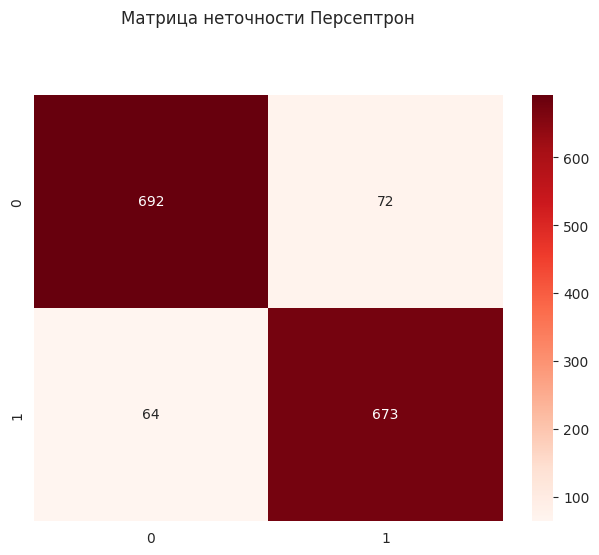

In [20]:
X = df.iloc[:,:6]
y = df["gender"]

sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

ppn = Perceptron(max_iter=100, eta0=0.1, random_state=0)
ppn.fit(X_train,y_train)
y1 = ppn.predict(X_test)
print('Неверно классифицированные образцы: %d' % (y_test != y1).sum())
print('Точность: %.2f' % accuracy_score(y_test, y1))

# матрица неточности

cnf_matrix_log = confusion_matrix(y_test, y1)
sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
plt.tight_layout()
plt.title('Матрица неточности Персептрон\n', y=1.1)

In [21]:
#Многослойный персептрон
from sklearn.neural_network import MLPRegressor # подключаем модуль
from sklearn.datasets import make_regression # функция для генерации данных
from sklearn.model_selection import train_test_split # разделение на обучение и тест

regr = MLPRegressor(random_state=1,
                    hidden_layer_sizes=(2,2,), # количество нейронов в скрытых слоях  (2слоя в каждом 2 нейрона)
                    max_iter=50 # число эпох обучения
                    ).fit(X_train, y_train) # создаем и обучаем регрессор из многослойного персептрона
pred=regr.predict(X_test) # проверяем на тесте
pred_train=regr.predict(X_train)
regr.score(X_test, y_test) # смотрим на качество решения

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


0.7454286985334337

Неверно классифицированные образцы: 51
Точность: 0.97


Text(0.5, 1.1, 'Матрица неточности Персептрон\n')

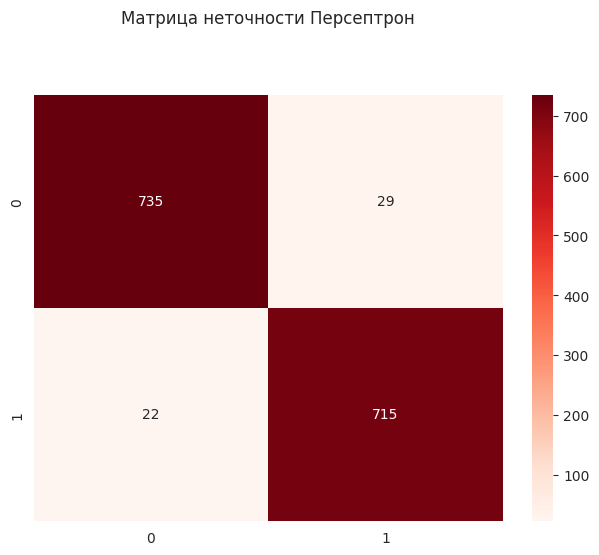

In [22]:
mlp= MLPClassifier(activation='relu', solver='lbfgs', alpha=1e-5, max_iter=10000, hidden_layer_sizes=(5,), random_state=1)
mlp.fit(X_train,y_train)
mlp_pred = mlp.predict(X_test)
print('Неверно классифицированные образцы: %d' % (y_test != mlp_pred).sum())
print('Точность: %.2f' % accuracy_score(y_test, mlp_pred))

# матрица неточности

cnf_matrix_log = confusion_matrix(y_test, mlp_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
plt.tight_layout()
plt.title('Матрица неточности Персептрон\n', y=1.1)

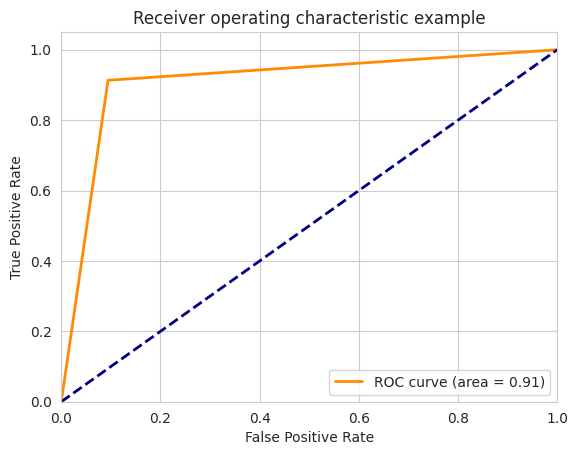

In [24]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
# ROC - анализ
y_score = ppn.predict(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, thresholds = roc_curve(y_test > 0, y_score  > 0)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

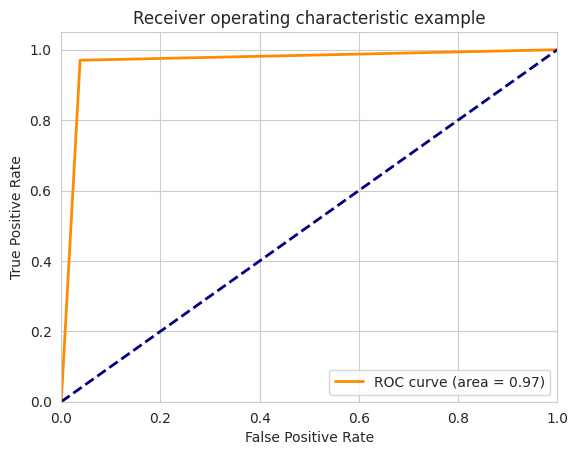

In [26]:
y_score = mlp.predict(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, thresholds = roc_curve(y_test > 0, y_score  > 0)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()